## Analysis of differential diagnosis study and results:
### Carcinoma vs Fibroadenoma based on ΔSoS
### LBFGS baselines

#### Sonia Laguna - ETH Zurich, September 2022
##### Plotting the results of the methods based on LBFGS used as baselines for the differential diagnosis case study between Carcinoma and Fibroadenoma on clinical data

#### Import

In [1]:
import numpy as np
import os
import scipy.stats
import matplotlib.pyplot as plt
import statistics
from sklearn.metrics import roc_curve, auc
import cv2
from skimage.morphology import binary_dilation
from skimage.morphology import binary_erosion
import skimage
import statistics

In [2]:
# modify the default parameters of np.load
np_load_old = np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

In [3]:
sign = []
num_sub = [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]

### Loading data ΔSoS and masks

In [4]:
CA_sos = np.load('/scratch_net/biwidl307/sonia/USImageReconstruction-Sonia/results/CA_lbfgs_sos.npy')
CA_mask = np.load('/scratch_net/biwidl307/sonia/USImageReconstruction-Sonia/results/CA_lbfgs_mask.npy')
CA_soslong = np.load('/scratch_net/biwidl307/sonia/USImageReconstruction-Sonia/results/CA_lbfgs_soslong.npy')
FA_sos = np.load('/scratch_net/biwidl307/sonia/USImageReconstruction-Sonia/results/FA_lbfgs_sos.npy')
FA_mask = np.load('/scratch_net/biwidl307/sonia/USImageReconstruction-Sonia/results/FA_lbfgs_mask.npy')
FA_soslong = np.load('/scratch_net/biwidl307/sonia/USImageReconstruction-Sonia/results/FA_lbfgs_soslong.npy')

### Computing dSoS lists based on different background selections
### Run desired cell:

#### Dilated mask 5mm

In [84]:
#Computing dSoS LBFGS
title= 'dil 5mm'
dSoS_lbfgs_FA = []
FA_mask[np.isnan(FA_mask)] = 0
FA_mask_out = FA_mask.copy()
dSoS_lbfgs_CA = []
CA_mask[np.isnan(CA_mask)] = 0
CA_mask_out = CA_mask.copy()

# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (16,16))
kernel = skimage.morphology.disk(8)
for m in range(np.shape(FA_mask)[-1]):
    #FA loading
    #Alternative dilation method
#     pos = np.where(FA_mask[...,m] == 1)
#     for i in range(len(pos[0])):
#         FA_mask_out[pos[0][i] - 8:pos[0][i] + 8, pos[1][i] - 8:pos[1][i] + 8,m] = 1
#     FA_mask_out[...,m] = FA_mask_out[...,m] -FA_mask[...,m]
    img_dilation = binary_dilation(FA_mask[...,m], kernel) 
    FA_mask_out[...,m] = img_dilation - FA_mask[...,m]
    pre_FA = FA_sos[m, ...]
    sig_in = np.median(np.transpose(pre_FA)[np.where((FA_mask[...,m]) == 1)])
    sig_out = np.mean(np.transpose(pre_FA)[np.where((FA_mask_out[...,m]) == 1)])
    dSoS_FA = np.abs(sig_in - sig_out)
    dSoS_lbfgs_FA.append(dSoS_FA)
    
    #CA loading
#     for i in range(len(pos[0])):
#         CA_mask_out[pos[0][i] - 8:pos[0][i] + 8, pos[1][i] - 8:pos[1][i] + 8,m] = 1
#     CA_mask_out[...,m] = CA_mask_out[...,m] -CA_mask[...,m]
    img_dilation_CA = binary_dilation(CA_mask[...,m], kernel) 
    CA_mask_out[...,m] = img_dilation_CA - CA_mask[...,m]
    pre_CA = CA_sos[m, ...]
    sig_in = np.median(np.transpose(pre_CA)[np.where((CA_mask[...,m]) == 1)])
    sig_out = np.mean(np.transpose(pre_CA)[np.where((CA_mask_out[...,m]) == 1)])
    #Definition of CNR alternates
    dSoS_CA = np.abs(sig_in - sig_out)
    dSoS_lbfgs_CA.append(dSoS_CA)

#### Dilated mask 10mm

In [25]:
#Computing dSoS LBFGS
title= 'dil 10mm'
dSoS_lbfgs_FA = []
FA_mask[np.isnan(FA_mask)] = 0
FA_mask_out = FA_mask.copy()
dSoS_lbfgs_CA = []
CA_mask[np.isnan(CA_mask)] = 0
CA_mask_out = CA_mask.copy()

kernel = skimage.morphology.disk(16)
for m in range(np.shape(FA_mask)[-1]):
    #FA loading
    img_dilation = binary_dilation(FA_mask[...,m], kernel) 
    FA_mask_out[...,m] = img_dilation - FA_mask[...,m]
    pre_FA = FA_sos[m, ...]
    sig_in = np.median(np.transpose(pre_FA)[np.where((FA_mask[...,m]) == 1)])
    sig_out = np.mean(np.transpose(pre_FA)[np.where((FA_mask_out[...,m]) == 1)])
    dSoS_FA = np.abs(sig_in - sig_out)
    dSoS_lbfgs_FA.append(dSoS_FA)
    
    #CA loading
    img_dilation_CA = binary_dilation(CA_mask[...,m], kernel) 
    CA_mask_out[...,m] = img_dilation_CA - CA_mask[...,m]
    pre_CA = CA_sos[m, ...]
    sig_in = np.median(np.transpose(pre_CA)[np.where((CA_mask[...,m]) == 1)])
    sig_out = np.mean(np.transpose(pre_CA)[np.where((CA_mask_out[...,m]) == 1)])
    #Definition of CNR alternates
    dSoS_CA = np.abs(sig_in - sig_out)
    dSoS_lbfgs_CA.append(dSoS_CA)

#### Dilated 5mm, 2mm gap

In [31]:
#Computing dSoS LBFGS
title= 'dil 5mm, 2mm gap'
dSoS_lbfgs_FA = []
FA_mask[np.isnan(FA_mask)] = 0
FA_mask_out = FA_mask.copy()
dSoS_lbfgs_CA = []
CA_mask[np.isnan(CA_mask)] = 0
CA_mask_out = CA_mask.copy()

kernel1 = skimage.morphology.disk(1)
kernel8 = skimage.morphology.disk(8)
kernel2 = skimage.morphology.disk(2)
for m in range(np.shape(FA_mask)[-1]):
    #FA loading
    img_eroded = binary_erosion(FA_mask[...,m],kernel1) 
    img_dilgap = binary_dilation(FA_mask[...,m], kernel2) 
    img_dilation = binary_dilation(img_dilgap, kernel8) 
    FA_mask_out[...,m] = np.uint(img_dilation) - np.uint(img_dilgap)
    FA_mask_i = np.uint(img_eroded)
    pre_FA = FA_sos[m, ...]
    sig_in = np.median(np.transpose(pre_FA)[np.where((FA_mask_i) == 1)])
    sig_out = np.mean(np.transpose(pre_FA)[np.where((FA_mask_out[...,m]) == 1)])
    dSoS_FA = np.abs(sig_in - sig_out)
    dSoS_lbfgs_FA.append(dSoS_FA)
    
    #CA loading
    img_eroded = binary_erosion(CA_mask[...,m], kernel1) 
    img_dilgap = binary_dilation(CA_mask[...,m], kernel2) 
    img_dilation = binary_dilation(img_dilgap, kernel8) 
    CA_mask_out[...,m] = np.uint(img_dilation) - np.uint(img_dilgap)
    CA_mask_i = np.uint(img_eroded)
    pre_CA = CA_sos[m, ...]
    sig_in = np.median(np.transpose(pre_CA)[np.where((CA_mask_i) == 1)])
    sig_out = np.mean(np.transpose(pre_CA)[np.where((CA_mask_out[...,m]) == 1)])
    #Definition of CNR alternates
    dSoS_CA = np.abs(sig_in - sig_out)
    dSoS_lbfgs_CA.append(dSoS_CA)

#### Dilated 10mm, 2mm gap

In [40]:
#Computing dSoS LBFGS
title= 'dil 10mm, 2mm gap'
dSoS_lbfgs_FA = []
FA_mask[np.isnan(FA_mask)] = 0
FA_mask_out = FA_mask.copy()
dSoS_lbfgs_CA = []
CA_mask[np.isnan(CA_mask)] = 0
CA_mask_out = CA_mask.copy()

kernel1 = skimage.morphology.disk(1)
kernel8 = skimage.morphology.disk(16)
kernel2 = skimage.morphology.disk(2)
for m in range(np.shape(FA_mask)[-1]):
    #FA loading
    img_eroded = binary_erosion(FA_mask[...,m],kernel1) 
    img_dilgap = binary_dilation(FA_mask[...,m], kernel2) 
    img_dilation = binary_dilation(img_dilgap, kernel8) 
    FA_mask_out[...,m] = np.uint(img_dilation) - np.uint(img_dilgap)
    FA_mask_i = np.uint(img_eroded)
    pre_FA = FA_sos[m, ...]
    sig_in = np.median(np.transpose(pre_FA)[np.where((FA_mask_i) == 1)])
    sig_out = np.mean(np.transpose(pre_FA)[np.where((FA_mask_out[...,m]) == 1)])
    dSoS_FA = np.abs(sig_in - sig_out)
    dSoS_lbfgs_FA.append(dSoS_FA)
    
    #CA loading
    img_eroded = binary_erosion(CA_mask[...,m], kernel1) 
    img_dilgap = binary_dilation(CA_mask[...,m], kernel2) 
    img_dilation = binary_dilation(img_dilgap, kernel8) 
    CA_mask_out[...,m] = np.uint(img_dilation) - np.uint(img_dilgap)
    CA_mask_i = np.uint(img_eroded)
    pre_CA = CA_sos[m, ...]
    sig_in = np.median(np.transpose(pre_CA)[np.where((CA_mask_i) == 1)])
    sig_out = np.mean(np.transpose(pre_CA)[np.where((CA_mask_out[...,m]) == 1)])
    #Definition of CNR alternates
    dSoS_CA = np.abs(sig_in - sig_out)
    dSoS_lbfgs_CA.append(dSoS_CA)

#### Lowest 10 pixels

In [78]:
#Computing dSoS LBFGS
title= 'lowest 10 pix'
dSoS_lbfgs_FA = []
FA_mask[np.isnan(FA_mask)] = 0
FA_mask_out = FA_mask.copy()
dSoS_lbfgs_CA = []
CA_mask[np.isnan(CA_mask)] = 0
CA_mask_out = CA_mask.copy()

for m in range(np.shape(FA_mask)[-1]):
    #FA loading
    pre_FA = FA_sos[m, ...]
    pre_l_FA = FA_soslong[m,...]
    sig_in = np.median(np.transpose(pre_FA)[np.where((FA_mask[...,m]) == 1)])
    sig_out = np.mean(pre_l_FA[:,-1])
    dSoS_FA = np.abs(sig_in - sig_out)
    dSoS_lbfgs_FA.append(dSoS_FA)
    
    #CA loading
    pre_CA = CA_sos[m, ...]
    pre_l_CA = CA_soslong[m,...]
    sig_in = np.median(np.transpose(pre_CA)[np.where((CA_mask[...,m]) == 1)])
    sig_out = np.mean(pre_l_CA[:,-1])
    #Definition of CNR alternates
    dSoS_CA = np.abs(sig_in - sig_out)
    dSoS_lbfgs_CA.append(dSoS_CA)

#### Lowest 5 mm (8 pixels SoS)

In [72]:
#Computing dSoS LBFGS
title= 'lowest 5 mm'
dSoS_lbfgs_FA = []
FA_mask[np.isnan(FA_mask)] = 0
FA_mask_out = FA_mask.copy()
dSoS_lbfgs_CA = []
CA_mask[np.isnan(CA_mask)] = 0
CA_mask_out = CA_mask.copy()

for m in range(np.shape(FA_mask)[-1]):
    #FA loading
    pre_FA = FA_sos[m, ...]
    pre_l_FA = FA_soslong[m,...]
    sig_in = np.median(np.transpose(pre_FA)[np.where((FA_mask[...,m]) == 1)])
    sig_out = np.mean(pre_l_FA[:,-8:])
    dSoS_FA = np.abs(sig_in - sig_out)
    dSoS_lbfgs_FA.append(dSoS_FA)
    #CA loading
    pre_CA = CA_sos[m, ...]
    pre_l_CA = CA_soslong[m,...]
    sig_in = np.median(np.transpose(pre_CA)[np.where((CA_mask[...,m]) == 1)])
    sig_out = np.mean(pre_l_CA[:,-8:])
    #Definition of CNR alternates
    dSoS_CA = np.abs(sig_in - sig_out)
    dSoS_lbfgs_CA.append(dSoS_CA)

#### Dieter's data

In [ ]:
dSoS_lbfgs_FA = []
dSoS_lbfgs_CA = []
CA_lbfgs = np.load('/scratch_net/biwidl307/sonia/USImageReconstruction-Melanie/results/contrast_LBFGSdieter_CA_med.npy')
FA_lbfgs = np.load('/scratch_net/biwidl307/sonia/USImageReconstruction-Melanie/results/contrast_LBFGSdieter_FA_med.npy')
title = 'Dieter''s'
for i in range(len(CA_lbfgs)):
    for k in range(len(CA_lbfgs[i])):
        dSoS_lbfgs_CA.append(CA_lbfgs[i][k])
        dSoS_lbfgs_FA.append(FA_lbfgs[i][k])            

### Frame selection methods

In [85]:
#Frame selection FA
new_lbfgs_FA = []     
tot_FA = []
m_lbfgs_FA = []
min_lbfgs_FA = []
med_lbfgs_FA = []
mean_lbfgs_FA = []
m_one_lbfgs_FA = []
m_rand_lbfgs_FA = []
for i in range(len(num_sub)):
    new_lbfgs_FA.append(dSoS_lbfgs_FA[sum(num_sub[:i]):sum(num_sub[:i+1])])
    m_lbfgs_FA.append(max(new_lbfgs_FA[i]))
    min_lbfgs_FA.append(min(new_lbfgs_FA[i]))
    med_lbfgs_FA.append(np.median(new_lbfgs_FA[i]))
    mean_lbfgs_FA.append(np.mean(new_lbfgs_FA[i]))
    m_one_lbfgs_FA.append(new_lbfgs_FA[i][0])
    m_rand_lbfgs_FA.append(new_lbfgs_FA[i][2])
tot_FA.append(dSoS_lbfgs_FA)
tot_FA.append(m_lbfgs_FA)
tot_FA.append(min_lbfgs_FA)
tot_FA.append(med_lbfgs_FA)
tot_FA.append(mean_lbfgs_FA)
tot_FA.append(m_one_lbfgs_FA)
tot_FA.append(m_rand_lbfgs_FA)

In [86]:
#Frame selection CA
new_lbfgs_CA = []     
tot_CA = []
m_lbfgs_CA = []
med_lbfgs_CA = []
mean_lbfgs_CA = []
m_one_lbfgs_CA = []
m_rand_lbfgs_CA = []
for i in range(len(num_sub)):
    new_lbfgs_CA.append(dSoS_lbfgs_CA[sum(num_sub[:i]):sum(num_sub[:i+1])])
    m_lbfgs_CA.append(max(new_lbfgs_CA[i]))
    med_lbfgs_CA.append(np.median(new_lbfgs_CA[i]))
    mean_lbfgs_CA.append(np.mean(new_lbfgs_CA[i]))
    m_one_lbfgs_CA.append(new_lbfgs_CA[i][0])
    m_rand_lbfgs_CA.append(new_lbfgs_CA[i][2])
tot_CA.append(dSoS_lbfgs_CA)
tot_CA.append(m_lbfgs_CA)
tot_CA.append(m_lbfgs_CA)
tot_CA.append(med_lbfgs_CA)
tot_CA.append(mean_lbfgs_CA)
tot_CA.append(m_one_lbfgs_CA)
tot_CA.append(m_rand_lbfgs_CA)

#### Creating dataset: Combining CA and FA

In [87]:
tot_CA = np.asarray(tot_CA)
tot_FA = np.asarray(tot_FA)
data = np.concatenate((tot_CA,tot_FA)).tolist()
data_copy = data
names = ['All_LBFGS_CA','max_LBFGS_CA','max_LBFGS_CA','med_LBFGS_CA','mean_LBFGS_CA','1st_LBFGS_CA','rand_LBFGS_CA',
         'All_LBFGS_FA','max_LBFGS_FA','min_LBFGS_FA','med_LBFGS_FA','mean_LBFGS_FA','1st_LBFGS_FA','rand_LBFGS_FA']
names_copy = names

/tmp/ipykernel_30402/118989921.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tot_CA = np.asarray(tot_CA)
/tmp/ipykernel_30402/118989921.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tot_FA = np.asarray(tot_FA)


### Testing pairwise

/tmp/ipykernel_30402/3625170169.py:51: RuntimeWarning: invalid value encountered in long_scalars
  prec = tp / (tp + fp)


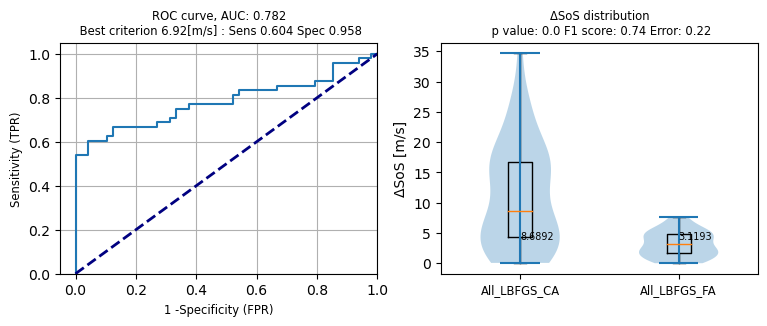

/tmp/ipykernel_30402/3625170169.py:51: RuntimeWarning: invalid value encountered in long_scalars
  prec = tp / (tp + fp)


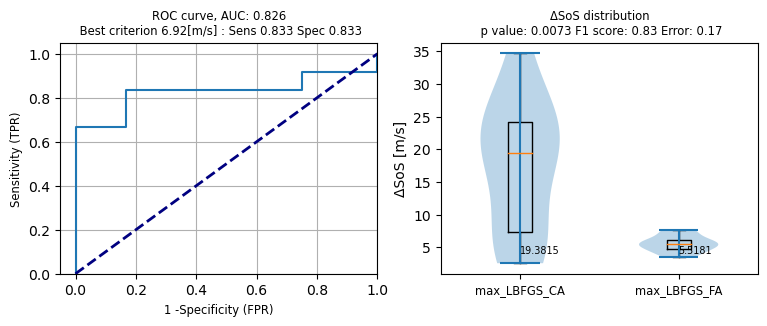

/tmp/ipykernel_30402/3625170169.py:51: RuntimeWarning: invalid value encountered in long_scalars
  prec = tp / (tp + fp)


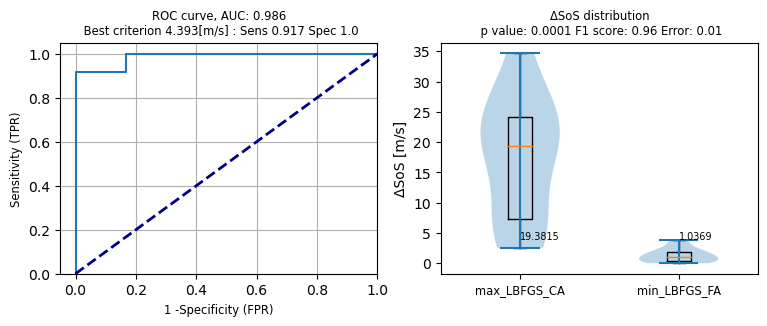

/tmp/ipykernel_30402/3625170169.py:51: RuntimeWarning: invalid value encountered in long_scalars
  prec = tp / (tp + fp)


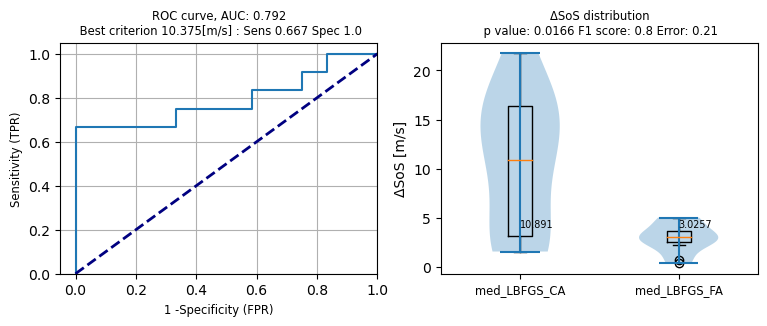

/tmp/ipykernel_30402/3625170169.py:51: RuntimeWarning: invalid value encountered in long_scalars
  prec = tp / (tp + fp)


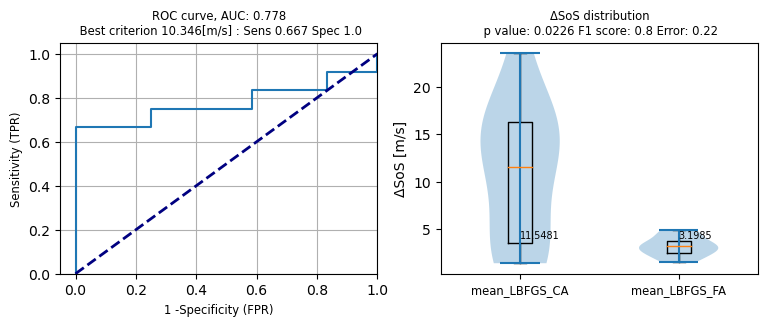

/tmp/ipykernel_30402/3625170169.py:51: RuntimeWarning: invalid value encountered in long_scalars
  prec = tp / (tp + fp)


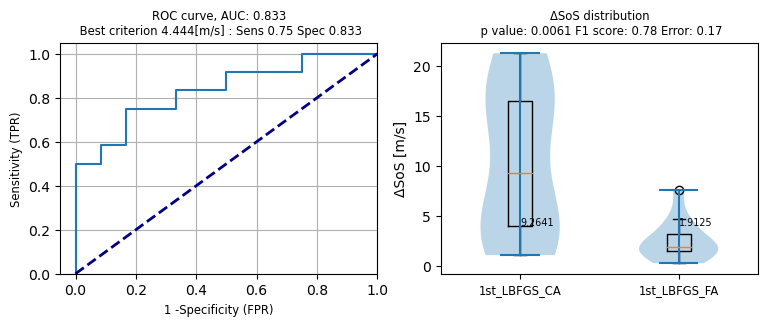

/tmp/ipykernel_30402/3625170169.py:51: RuntimeWarning: invalid value encountered in long_scalars
  prec = tp / (tp + fp)


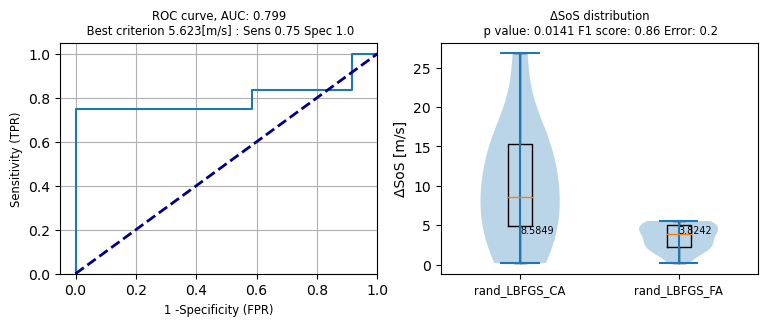

In [88]:
"""
Creating the metrics and plots of the differential diagnosis study
"""
sign = []
norm_counts_tot = []
AUC_tot = []

# Total number of methods (pairs) under study
n_test = 7

for k in range(n_test):
    count = 1
    #Creating pairs
    data = [(data_copy[k]), (data_copy[k+n_test])]
    names = [names_copy[k], names_copy[k+n_test]]
    names_tot.append(names)
#     print('Analyzing: ', names)

    #Computing p-value: Nonparametric data, using  Wilcoxon rank sum, also known as mann whitney u test
    st_m,p_m = scipy.stats.mannwhitneyu(data[0],data[1])
    #The p-value for a hypothesis test whose null hypotheisis is that two sets of data are uncorrelated.
    
    #Computing F1 score if it was a classification problem
    f1_FA = []
    cont_FA = []
    f1_CA = []
    cont_CA = []
    for i in range(len(data[1])):
        # First looking at the amount of false negatives that would appear
        cont_1 = data[1][i]
        fn = np.sum(data[0] <= cont_1)
        tp = np.sum(data[0] > cont_1)
        fp = np.sum(data[1] > cont_1)

        # Precision: True pos / (true pos + false pos)
        prec = tp / (tp + fp)
        # Recall: True pos/ (true pos + false neg)
        rec = tp / (tp + fn)
        # F1 score: 2*(precision*recall)/(precision + recall)
        f1_fa = 2 * (prec * rec) / (prec + rec)
        f1_FA.append(f1_fa)
        cont_FA.append(cont_1)
        
        # Next looking at the amount of false postives that would appear
        cont_2 = data[0][i]
        fp = np.sum(data[1] >= cont_2)
        fn = np.sum(data[0] <= cont_2)
        tp = np.sum(data[0] > cont_2)

        # Precision: True pos / (true pos + false pos)
        prec = tp / (tp + fp)
        # Recall: True pos/ (true pos + false neg)
        rec = tp / (tp + fn)
        # F1 score: 2*(precision*recall)/(precision + recall)
        f1_ca = 2 * (prec * rec) / (prec + rec)
        f1_CA.append(f1_ca)
        cont_CA.append(cont_2)
    F1 = max([max(f1_CA), max(f1_FA)])
    id_1 = np.nanargmax([max(f1_CA), max(f1_FA)])
    if np.sum(np.shape(id_1))> 1 :
        id_1 = id_1[0]
    id_2 = [np.nanargmax(f1_CA), np.nanargmax(f1_FA)]
    cont = [cont_CA, cont_FA]
    cont_max = cont[id_1][id_2[id_1]]
    #Best F1, 1; worst F1 0
    
    #Computing error metric
    count = 0
    for i in range(len(data[0])):
        for j in range(len(data[1])):
            if data[0][i]<data[1][j]:
                count+=1
                
    #Computing ROC curve of one pair
    kr = np.concatenate([data[0], data[1]])
    label = np.concatenate([np.ones((len(data[0]))), np.zeros((len(data[1])))])
    fpr, tpr, thr = roc_curve(label, kr)
    roc_auc = auc(fpr, tpr)
    a = []
    maxs = np.argmax(tpr + 1 - fpr)
    if np.sum(np.shape(maxs)) >= 1:
        for i in range(np.sum(np.shape(maxs)) >= 1):
            a.append(tpr[i])
        id = np.argmax(a)
        maxs = maxs[id]
#     #Computing F1 score based on ROC criterion
#     cont = maxs
#     fn = np.sum(data[0] <= cont)
#     tp = np.sum(data[0] > cont)
#     fp = np.sum(data[1] > cont)
#     # print('Should be total elements: ', (tp + fn))
#     # Precision: True pos / (true pos + false pos)
#     prec = tp / (tp + fp)
#     # Recall: True pos/ (true pos + false neg)
#     rec = tp / (tp + fn)
#     # F1 score: 2*(precision*recall)/(precision + recall)
#     F1_ROC = 2 * (prec * rec) / (prec + rec)
#     print('F1 score ROC: ', F1_ROC)

    #Plotting final results, ROC curve
    fig2, ax2 = plt.subplots(1,2,figsize = (9,3))
    ax2[0].plot(fpr, tpr)
    ax2[0].plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    ax2[0].set_xlim([-0.05, 1.0])
    ax2[0].set_ylim([0.0, 1.05])
    ax2[0].set_xlabel('1 -Specificity (FPR)',size = 'small')
    ax2[0].set_ylabel('Sensitivity (TPR)',size = 'small')
    ax2[0].grid('on')
    ax2[0].set_title('ROC curve, AUC: ' + str(np.round(roc_auc, decimals=3)) + '\n Best criterion ' + str(np.round(thr[maxs],decimals = 3)) +'[m/s] : Sens ' + str(np.round(tpr[maxs],decimals = 3)) + ' Spec ' + str(np.round(1- fpr[maxs],decimals = 3)) ,size='small')

    #Plotting final results, data distribution
    ax2[1].boxplot(data)
    ax2[1].set_xticklabels(names, size = 'small')
    ax2[1].violinplot(data)
    for i in range(len(data)):
        ax2[1].text(i + 1, 4, np.around(statistics.median(data[i]), decimals=4), ha='left', size = 'x-small')
    ax2[1].set_title('ΔSoS distribution' '\n p value: ' + str(np.around(p_m, decimals=4)) + ' F1 score: ' + str(np.around(F1, decimals=2)) + ' Error: ' + str(np.round(count/(len(data[0])*len(data[1])),decimals=2)),size='small')
    ax2[1].set_ylabel('ΔSoS [m/s]')
    #plt.ylim(0,9)
#     pk = 0
#     while os.path.isfile('/scratch_net/biwidl307/sonia/kk/figures/dilated_case_study_all' + str(k) + str(pk) + '.pdf'):
#         pk += 1
#     plt.savefig('/scratch_net/biwidl307/sonia/kk/figures/dilated_case_study_all' + str(k) + str(pk) + '.pdf')
    plt.show()
    sign.append([np.round(p_m,decimals = 5), np.round(roc_auc, decimals = 4), np.round(F1, decimals = 4), count,np.round(count/(len(data[0])*len(data[1])),decimals=4),names])
    norm_counts_tot.append(count/(len(data[0])*len(data[1])))
    AUC_tot.append(roc_auc)    

#### Final metrics, sorted

In [89]:
#Sorting based on norm counts
id_c = np.argsort(norm_counts_tot)
id_auc = np.argsort(AUC_tot)
print(title, 'Ordered based on Norm_counts:')
print('P-value   AUC  F1_score Counts Norm_Counts    Data')
for i in range(len(id_c)):
#     print(sign[id_c[i]],id_c[i])
    print(sign[id_c[i]])
#Uncomment below to order based on AUC
# print('Ordered based on AUC:')
# print('P-value   AUC  F1_score Counts Norm_Counts    Data')
# for i in range(len(id_auc)):
#     print(sign[id_auc[-(1+i)]])

dil 5mm Ordered based on Norm_counts:
P-value   AUC  F1_score Counts Norm_Counts    Data
[6e-05, 0.9861, 0.9565, 2, 0.0139, ['max_LBFGS_CA', 'min_LBFGS_FA']]
[0.0061, 0.8333, 0.7826, 24, 0.1667, ['1st_LBFGS_CA', '1st_LBFGS_FA']]
[0.00726, 0.8264, 0.8333, 25, 0.1736, ['max_LBFGS_CA', 'max_LBFGS_FA']]
[0.01414, 0.7986, 0.8571, 29, 0.2014, ['rand_LBFGS_CA', 'rand_LBFGS_FA']]
[0.01657, 0.7917, 0.8, 30, 0.2083, ['med_LBFGS_CA', 'med_LBFGS_FA']]
[0.0, 0.7817, 0.7442, 503, 0.2183, ['All_LBFGS_CA', 'All_LBFGS_FA']]
[0.02258, 0.7778, 0.8, 32, 0.2222, ['mean_LBFGS_CA', 'mean_LBFGS_FA']]
